## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"], how="left")
# Display the data table for preview
data_complete

In [ ]:
# Checking the number of mice.
Unique_mice_df =(data_complete["Mouse ID"]).unique()
len(Unique_mice_df)

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep='last')
print(dup_mouse)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = data_complete[data_complete.duplicated(subset=["Mouse ID","Timepoint"])]
print(dup_mouse_data)

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='last')
print(len(clean_mice_df))

In [ ]:
# Checking the number of mice in the clean DataFrame.
number_mice_df = pd.unique(clean_mice_df["Mouse ID"])
len(number_mice_df)

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

stat_mean_byregimen = clean_mice_df.groupby(["Drug Regimen"]).mean()
stat_mean_ = stat_mean_byregimen.loc[:,'Tumor Volume (mm3)']
stat_mean_bytumor = pd.Series(stat_mean_, name="Mean")
print(stat_mean_bytumor)

stat_median_byregimen = clean_mice_df.groupby(["Drug Regimen"]).median()
median_ = stat_median_byregimen.loc[:,'Tumor Volume (mm3)']
median_bytumor = pd.Series(median_, name="Median")
print(median_bytumor)

stat_variance_byregimen = clean_mice_df.groupby(["Drug Regimen"]).var()
variance_ = stat_variance_byregimen.loc[:,'Tumor Volume (mm3)']
variance_bytumor = pd.Series(variance_, name="Variance")
print(variance_bytumor)

stat_stddevi_byregimen = clean_mice_df.groupby(["Drug Regimen"]).std()
stdDevi_ = stat_stddevi_byregimen.loc[:,'Tumor Volume (mm3)']
stdDevi_bytumor = pd.Series(stdDevi_, name="Standard Deviation")
print(stdDevi_bytumor)

stat_SEM_byregimen = clean_mice_df.groupby(["Drug Regimen"]).sem()
stat_SEM_ = stat_SEM_byregimen.loc[:,'Tumor Volume (mm3)']
stat_SEM_bytumor = pd.Series(stat_SEM_, name="SEM")
print(stat_SEM_bytumor)

In [ ]:
# Assemble the resulting series into a single summary dataframe.

df1 = [stat_mean_bytumor, median_bytumor, variance_bytumor, stdDevi_bytumor, stat_SEM_bytumor]
Statistical_Summary_DF = pd.concat(df1, axis=1)
Statistical_Summary_DF

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_mice_df.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
agg_summary

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_group = clean_mice_df.groupby(["Drug Regimen"]).count()
mice_ID = mice_group.loc[:,"Mouse ID"]
unique_mice_byregimen = pd.DataFrame(mice_ID)

unique_mice_byregimen.plot(kind="bar")

plt.title("# of Unique Mice Tested")


In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#print(unique_mice_byregimen.index)

x_axis = np.arange(len(unique_mice_byregimen.index))
tick_locations = [value for value in x_axis]

plt.title("# of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice ID's")

plt.xlim(-.75, len(unique_mice_byregimen.index)-.25)
plt.ylim(0, max(mice_ID) +10)

plt.bar(x_axis, mice_ID, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, unique_mice_byregimen.index, rotation = 'vertical')
plt.show()
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female = clean_mice_df.loc[:,["Mouse ID","Sex"]]
male_female

clean_male_female = male_female.drop_duplicates(subset=["Mouse ID", "Sex"], keep='last')
mf_pie = clean_male_female["Sex"].value_counts()
mf_pie.plot(kind="pie", y= "Sex", title = ("Distibution of Female vs Male Mice"))

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mf = clean_male_female["Sex"].unique()
colors = "darkorange", "royalblue"
plt.pie(mf_pie, labels=mf, colors=colors,
        autopct="%1.1f%%", startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_count_one = clean_mice_df.loc[clean_mice_df['Drug Regimen']=="Capomulin"]
drug_count_two = clean_mice_df.loc[clean_mice_df['Drug Regimen']=="Ramicane"]
drug_count_three = clean_mice_df.loc[clean_mice_df['Drug Regimen']=="Infubinol"]
drug_count_four = clean_mice_df.loc[clean_mice_df['Drug Regimen']=="Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorgrp_onef = drug_count_one.groupby("Mouse ID").first()
tumorgrp_one = drug_count_one.groupby("Mouse ID").last()
final_tumor_volume_CAP = (tumorgrp_one['Tumor Volume (mm3)']-tumorgrp_onef['Tumor Volume (mm3)'])

tumorgrp_twof = drug_count_two.groupby("Mouse ID").first()
tumorgrp_two = drug_count_two.groupby("Mouse ID").last()
final_tumor_volume_RAM = (tumorgrp_two['Tumor Volume (mm3)']-tumorgrp_twof['Tumor Volume (mm3)'])

tumorgrp_threef = drug_count_three.groupby("Mouse ID").first()
tumorgrp_three = drug_count_three.groupby("Mouse ID").last()
final_tumor_volume_INF = (tumorgrp_three['Tumor Volume (mm3)']-tumorgrp_threef['Tumor Volume (mm3)'])

tumorgrp_fourf = drug_count_four.groupby("Mouse ID").first()
tumorgrp_four = drug_count_four.groupby("Mouse ID").last()
final_tumor_volume_CEF = (tumorgrp_four['Tumor Volume (mm3)']-tumorgrp_fourf['Tumor Volume (mm3)'])

Capomulin_df = tumorgrp_one['Tumor Volume (mm3)']
Ramicane_df = tumorgrp_two['Tumor Volume (mm3)']
Infubinol_df  = tumorgrp_three['Tumor Volume (mm3)']
Ceftamin_df  = tumorgrp_four['Tumor Volume (mm3)']
print(Capomulin_df)


Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64


In [123]:
# Put treatments into a list for for loop (and later for plot labels
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#QUARTILES FOR CAPOMULIN
quartiles = Capomulin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    # add subset 
print(f"The lower quartile of CAPOMULIN is: {lowerq}")
print(f"The upper quartile of CAPOMULIN is: {upperq}")
print(f"The interquartile range of CAPOMULIN is: {iqr}")
print(f"The the median of CAPOMULIN is: {quartiles[0.5]} ")
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#QUARTILES FOR RAMICANE
quartiles = Ramicane_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    # add subset 
print(f"The lower quartile of RAMICANE is: {lowerq}")
print(f"The upper quartile of RAMICANE is: {upperq}")
print(f"The interquartile range of RAMICANE is: {iqr}")
print(f"The the median of RAMICANE is: {quartiles[0.5]} ")
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#QUARTILES FOR INFUBINOL
quartiles = Infubinol_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    # add subset 
print(f"The lower quartile of INFUBINOL is: {lowerq}")
print(f"The upper quartile of INFUBINOL is: {upperq}")
print(f"The interquartile range of INFUBINOL is: {iqr}")
print(f"The the median of INFUBINOL is: {quartiles[0.5]} ")
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#QUARTILES FOR CEFTAMIN
quartiles = Ceftamin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    # add subset 
print(f"The lower quartile of CEFTAMIN is: {lowerq}")
print(f"The upper quartile of CEFTAMIN is: {upperq}")
print(f"The interquartile range of CEFTAMIN is: {iqr}")
print(f"The the median of CEFTAMIN is: {quartiles[0.5]} ")
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of CAPOMULIN is: 32.37735684
The upper quartile of CAPOMULIN is: 40.1592203
The interquartile range of CAPOMULIN is: 7.781863460000004
The the median of CAPOMULIN is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of RAMICANE is: 31.56046955
The upper quartile of RAMICANE is: 40.65900627
The interquartile range of RAMICANE is: 9.098536719999998
The the median of RAMICANE is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of INFUBINOL is: 54.04860769
The upper quartile of INFUBINOL is: 65.52574285
The interquartile range of INFUBINOL is: 11.477135160000003
The the median of INFUBINOL is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of CEFTAMIN is: 48.72207785
The upper quartile of CEFTAMIN is: 64.29983003
The interquart

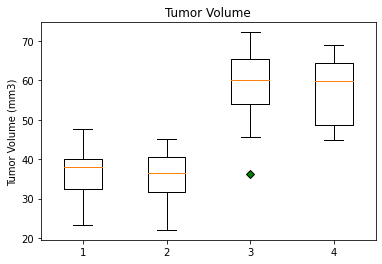

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

           Tumor Volume (mm3)
Timepoint                    
0                   45.000000
5                   42.261665
10                  42.992077
15                  43.529876
20                  43.967895
25                  44.596219
30                  45.261384
35                  45.941949
40                  46.821070
45                  47.685963


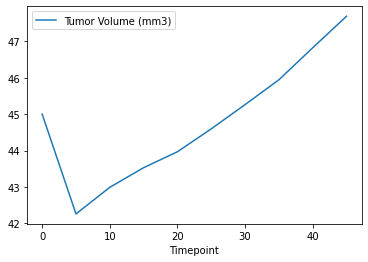

In [140]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
 # Filter the DataFrame down only to those columns to chart   
mouse_i557_data = drug_count_one.loc[drug_count_one["Mouse ID"]=="i557",["Timepoint", "Tumor Volume (mm3)"]]

mouse_i557_data = mouse_i557_data.set_index("Timepoint")
print(mouse_i557_data)
mouse_i557_data.plot(label="Mouse I557")
plt.legend
plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:

MinTimepoints_grp = four_drugs_df.groupby("Mouse ID").Timepoint.min()
MaxTimepoints_grp = four_drugs_df.groupby("Mouse ID").Timepoint.max()
Mouse_min_tumorsize = four_drugs_df.groupby("Mouse ID")["Tumor Volume (mm3)"].min()
Mouse_max_tumorsize= four_drugs_df.groupby("Mouse ID")['Tumor Volume (mm3)'].max()
Time_min_tumorgrp = four_drugs_df.groupby("Timepoint")['Mouse ID'].count()
Time_max_tumorgrp = four_drugs_df.groupby("Timepoint")['Mouse ID'].count()
#df2 = [MinTimepoints_grp, MaxTimepoints_grp, Mouse_min_tumorsize, Mouse_max_tumorsize]


result = [f(x) for x in df['col']]
# Iterating over two columns, use `zip`
result = [f(x, y) for x, y in zip(df['col1'], df['col2'])]
# Iterating over multiple columns - same data type
result = [f(row[0], ..., row[n]) for row in df[['col1', ...,'coln']].to_numpy()]
# Iterating over multiple columns - differing data type
result = [f(row[0], ..., row[n]) for row in zip(df['col1'], ..., df['coln'])]

#MinMaxTimepoints_df = pd.concat(df2, axis=1)
#Time_max_tumorgrp
#MinMaxTimepoints_df


for index, row in four_drugs_df.iterrows():

    # get restaurant type from df
    restr_type = row['ethnicity']

    # add keyword to params dict
    params['keyword'] = restr_type

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {restr_type}.")
    response = requests.get(base_url, params=params).json()
    #print('\n', 'response is of datatype ', type(response), '\n')
    
    # extract results
    results = response['results']
    
    try:
        print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
        types_df.loc[index, 'name'] = results[0]['name']
        types_df.loc[index, 'address'] = results[0]['vicinity']
        types_df.loc[index, 'price_level'] = results[0]['price_level']
        types_df.loc[index, 'rating'] = results[0]['rating']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
    
    
    
    
    
    for i in search_mice['Timepoint'][0:]:
    if i == 0:
        mouse = row['Mouse ID']
        vol = row['Tumor Volume (mm3)']
        
        mouseid['keyword'] = mouse
        tumorVol['keyword'] = vol
    
    elif i != p:
        mouse = row['Mouse ID']
        vol = row['Tumor Volume (mm3)']
        
        mouseid['keyword'] = mouse
        tumorVol['keyword'] = vol
    else:
        pass

    
    
    MinTimepoints = []
l = times[0]
for j in times[1:]:
    if j == l:
        for k in tumorzize
            MinTimepoints.append(k)
    elif:
        MinTimepoints.append(i)
        x = i
j = times[0]
MaxTimepoints = []
    
    
    
    
    


times = four_drugs_df["Timepoint"]
tumorsize = four_drugs_df["Tumor Volume (mm3)"]

MinTimepoints = []
l = times[0]
for j in times[1:]:
    if j == l:
        for k in tumorzize
            MinTimepoints.append(k)
    elif:
        MinTimepoints.append(i)
        x = i
j = times[0]
MaxTimepoints = []
    
    
    
    
    else:
        p = search_mice['Mouse ID'][0]
        y = [p]
        for i in search_mice:
            if ['Mouse ID'] != p:
            mouse = ['Mouse ID']
            vol = ['Tumor Volume (mm3)'] 
            mouseid.append(mouse)
            tumorVol.append(vol)
            p = i
    
    
    
#print(time_bymouse)
#greatest_timepoint = timepoint_max.describe()

